In [13]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("tabla_country_dinamica.csv")

In [3]:
data

,Country,Model,M.B.C USD,Power Consumtion,TH/s,USD Profit,BTC Profit
0,Afganistán,Antminer S17+ 70TH/s,102.2000,2800,70,139.569604,0.015218
1,Afganistán,Antminer S17e-60TH/s,98.5500,2700,60,119.631089,0.013044
2,Afganistán,Antminer S19 - 95TH/s,118.6250,3250,95,189.415892,0.020653
3,Afganistán,Antminer S19 Pro 110TH/s,118.6250,3250,110,219.323664,0.023914
4,Afganistán,Antminer S9 SE-16TH/s,46.7200,1280,16,31.901624,0.003478
...,...,...,...,...,...,...,...
1174,Zambia,Antminer S9 SE-16TH/s,28.0320,1280,16,31.901624,0.003478
1175,Zambia,Antminer S9k-13.5TH/s,25.1412,1148,14,27.913921,0.003044
1176,Zambia,Antminer T17+ 58TH/s,63.5100,2900,58,115.643386,0.012609
1177,Zambia,Antminer T19 - 84TH/s,68.9850,3150,84,167.483525,0.018262


In [39]:
def total_profit(x,y):
    total=((x*y)/x)*100
    return total
    

In [4]:
data["Real Profit %"]=((data["USD Profit"]-data["M.B.C USD"])/data["USD Profit"])*100

In [5]:
data

,Country,Model,M.B.C USD,Power Consumtion,TH/s,USD Profit,BTC Profit,Real Profit %
0,Afganistán,Antminer S17+ 70TH/s,102.2000,2800,70,139.569604,0.015218,26.774887
1,Afganistán,Antminer S17e-60TH/s,98.5500,2700,60,119.631089,0.013044,17.621748
2,Afganistán,Antminer S19 - 95TH/s,118.6250,3250,95,189.415892,0.020653,37.373259
3,Afganistán,Antminer S19 Pro 110TH/s,118.6250,3250,110,219.323664,0.023914,45.913269
4,Afganistán,Antminer S9 SE-16TH/s,46.7200,1280,16,31.901624,0.003478,-46.450225
...,...,...,...,...,...,...,...,...
1174,Zambia,Antminer S9 SE-16TH/s,28.0320,1280,16,31.901624,0.003478,12.129865
1175,Zambia,Antminer S9k-13.5TH/s,25.1412,1148,14,27.913921,0.003044,9.933111
1176,Zambia,Antminer T17+ 58TH/s,63.5100,2900,58,115.643386,0.012609,45.081165
1177,Zambia,Antminer T19 - 84TH/s,68.9850,3150,84,167.483525,0.018262,58.810874


In [6]:
from sklearn import preprocessing

In [28]:
mm_scaler = preprocessing.MinMaxScaler()
x= mm_scaler.fit_transform(data.groupby(["Country"])[["Real Profit %"]].sum()/9)

In [21]:
data.groupby(["Country"])[["Real Profit %"]].sum()/9

,Real Profit %
Country,
Afganistán,3.562923
Albania,-92.874153
Alemania,-594.346952
Andorra,-156.522624
Angola,61.425169
...,...
Uganda,-247.173476
Uruguay,-247.173476
Venezuela,94.985272


In [49]:
len(data.groupby(["Country"])[["Real Profit"]].sum())

131

In [47]:
len(X_train_minmax)

131

In [23]:
ranking_data=data.groupby(["Country"])[["Real Profit %"]].sum()/9

In [24]:
ranking_data

,Real Profit %
Country,
Afganistán,3.562923
Albania,-92.874153
Alemania,-594.346952
Andorra,-156.522624
Angola,61.425169
...,...
Uganda,-247.173476
Uruguay,-247.173476
Venezuela,94.985272


In [29]:
ranking_data["Profitable_Rank"]=x

In [30]:
ranking_data

,Real Profit %,Profitable_Rank
Country,,
Afganistán,3.562923,0.891632
Albania,-92.874153,0.777321
Alemania,-594.346952,0.182899
Andorra,-156.522624,0.701875
Angola,61.425169,0.960219
...,...,...
Uganda,-247.173476,0.594422
Uruguay,-247.173476,0.594422
Venezuela,94.985272,1.000000


In [34]:
rankin_data=ranking_data.sort_values(["Real Profit %"],ascending=False)

In [37]:
rank_0=rankin_data[rankin_data["Real Profit %"]>0]

In [38]:
rank_50=rankin_data[rankin_data["Real Profit %"]>50]

In [39]:
rank_75=rankin_data[rankin_data["Real Profit %"]>5]

In [40]:
rank_75

,Real Profit %,Profitable_Rank
Country,,
Venezuela,94.985272,1.000000
Arabia Saudita,93.249405,0.997942
Bielorrusia,84.762942,0.987883
Egipto,82.641326,0.985368
Sudán,80.712585,0.983082
Libia,80.712585,0.983082


In [41]:
rank_50

,Real Profit %,Profitable_Rank
Country,,
Venezuela,94.985272,1.000000
Arabia Saudita,93.249405,0.997942
Bielorrusia,84.762942,0.987883
Egipto,82.641326,0.985368
Sudán,80.712585,0.983082
Libia,80.712585,0.983082
Irán,71.068877,0.971651
Nigeria,61.425169,0.960219
Angola,61.425169,0.960219


In [48]:
rank_10=rankin_data[rankin_data["Real Profit %"]>10]

In [49]:
len(rank_10)

25

In [50]:
rank_10

,Real Profit %,Profitable_Rank
Country,,
Venezuela,94.985272,1.000000
Arabia Saudita,93.249405,0.997942
Bielorrusia,84.762942,0.987883
Egipto,82.641326,0.985368
Sudán,80.712585,0.983082
Libia,80.712585,0.983082
Irán,71.068877,0.971651
Nigeria,61.425169,0.960219
Angola,61.425169,0.960219


In [61]:
rankin_data.loc[rankin_data["Country"]=="Estados Unidos"]

,Country,Real Profit %
39,Estados Unidos,-35.011907


In [53]:
rankin_data["Country"]=rankin_data.index

In [55]:
rankin_data.reset_index(drop=True)

,Real Profit %,Profitable_Rank,Country
0,94.985272,1.000000,Venezuela
1,93.249405,0.997942,Arabia Saudita
2,84.762942,0.987883,Bielorrusia
3,82.641326,0.985368,Egipto
4,80.712585,0.983082,Sudán
...,...,...,...
126,-594.346952,0.182899,Alemania
127,-671.496614,0.091449,San Marino
128,-671.496614,0.091449,Rumanía
129,-671.496614,0.091449,Malta


In [57]:
rankin_data=rankin_data[["Country","Real Profit %"]]

In [60]:
rankin_data

,Country,Real Profit %
0,Venezuela,94.985272
1,Arabia Saudita,93.249405
2,Bielorrusia,84.762942
3,Egipto,82.641326
4,Sudán,80.712585
...,...,...
126,Alemania,-594.346952
127,San Marino,-671.496614
128,Rumanía,-671.496614
129,Malta,-671.496614


In [59]:
rankin_data=rankin_data.reset_index(drop=True)

In [62]:
data_list_price=pd.read_csv("consumption_table_by_group.csv")

In [65]:
data_list_price.loc[data_list_price["Country"]=="Estados Unidos"]

,Country,Model,M.B.C USD
333,Estados Unidos,Antminer S19 Pro 110TH/s,166.0750
334,Estados Unidos,Antminer S19 - 95TH/s,166.0750
335,Estados Unidos,Antminer T17+ 58TH/s,148.1900
336,Estados Unidos,Antminer T19 - 84TH/s,160.9650
337,Estados Unidos,Antminer S17e-60TH/s,137.9700
338,Estados Unidos,Antminer S17+ 70TH/s,143.0800
339,Estados Unidos,Antminer S9 SE-16TH/s,65.4080
340,Estados Unidos,Antminer S9k-13.5TH/s,58.6628
341,Estados Unidos,INNOSILICON T2T-29T,112.4200


In [67]:
data.loc[data["Country"]=="Estados Unidos"]

,Country,Model,M.B.C USD,Power Consumtion,TH/s,USD Profit,BTC Profit,Real Profit %
387,Estados Unidos,Antminer S17+ 70TH/s,143.0800,2800,70,139.569604,0.015218,-2.515158
388,Estados Unidos,Antminer S17e-60TH/s,137.9700,2700,60,119.631089,0.013044,-15.329552
389,Estados Unidos,Antminer S19 - 95TH/s,166.0750,3250,95,189.415892,0.020653,12.322562
390,Estados Unidos,Antminer S19 Pro 110TH/s,166.0750,3250,110,219.323664,0.023914,24.278577
391,Estados Unidos,Antminer S9 SE-16TH/s,65.4080,1280,16,31.901624,0.003478,-105.030315
392,Estados Unidos,Antminer S9k-13.5TH/s,58.6628,1148,14,27.913921,0.003044,-110.156073
393,Estados Unidos,Antminer T17+ 58TH/s,148.1900,2900,58,115.643386,0.012609,-28.143947
394,Estados Unidos,Antminer T19 - 84TH/s,160.9650,3150,84,167.483525,0.018262,3.892040
395,Estados Unidos,INNOSILICON T2T-29T,112.4200,2200,29,57.821693,0.006305,-94.425299


In [72]:
data_elec=pd.read_csv("../../blockchain data\costo_electrico.csv")

In [74]:
data_elec.loc[data_elec["Countrys"]=="Estados Unidos"]

,Unnamed: 0,Countrys,(Kw/h) USD
37,37,Estados Unidos,0.07


In [75]:
rankin_data.to_csv("ranking_data.csv")

In [77]:
import matplotlib.pyplot as plt


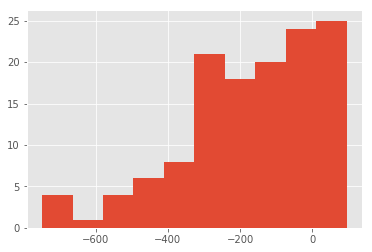

In [99]:
x=rankin_data["Real Profit %"]
plt.hist(x)

plt.style.use('ggplot')
plt.show()

In [94]:
x={}
for i in range(len(rankin_data)):
    x[rankin_data["Country"][i]]=rankin_data["Real Profit %"][i]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D738A9EE80>]],
      dtype=object)

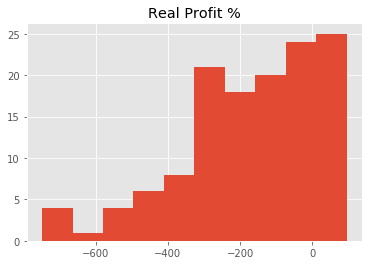

In [102]:
rankin_data.hist(column=["Real Profit %","Country"])

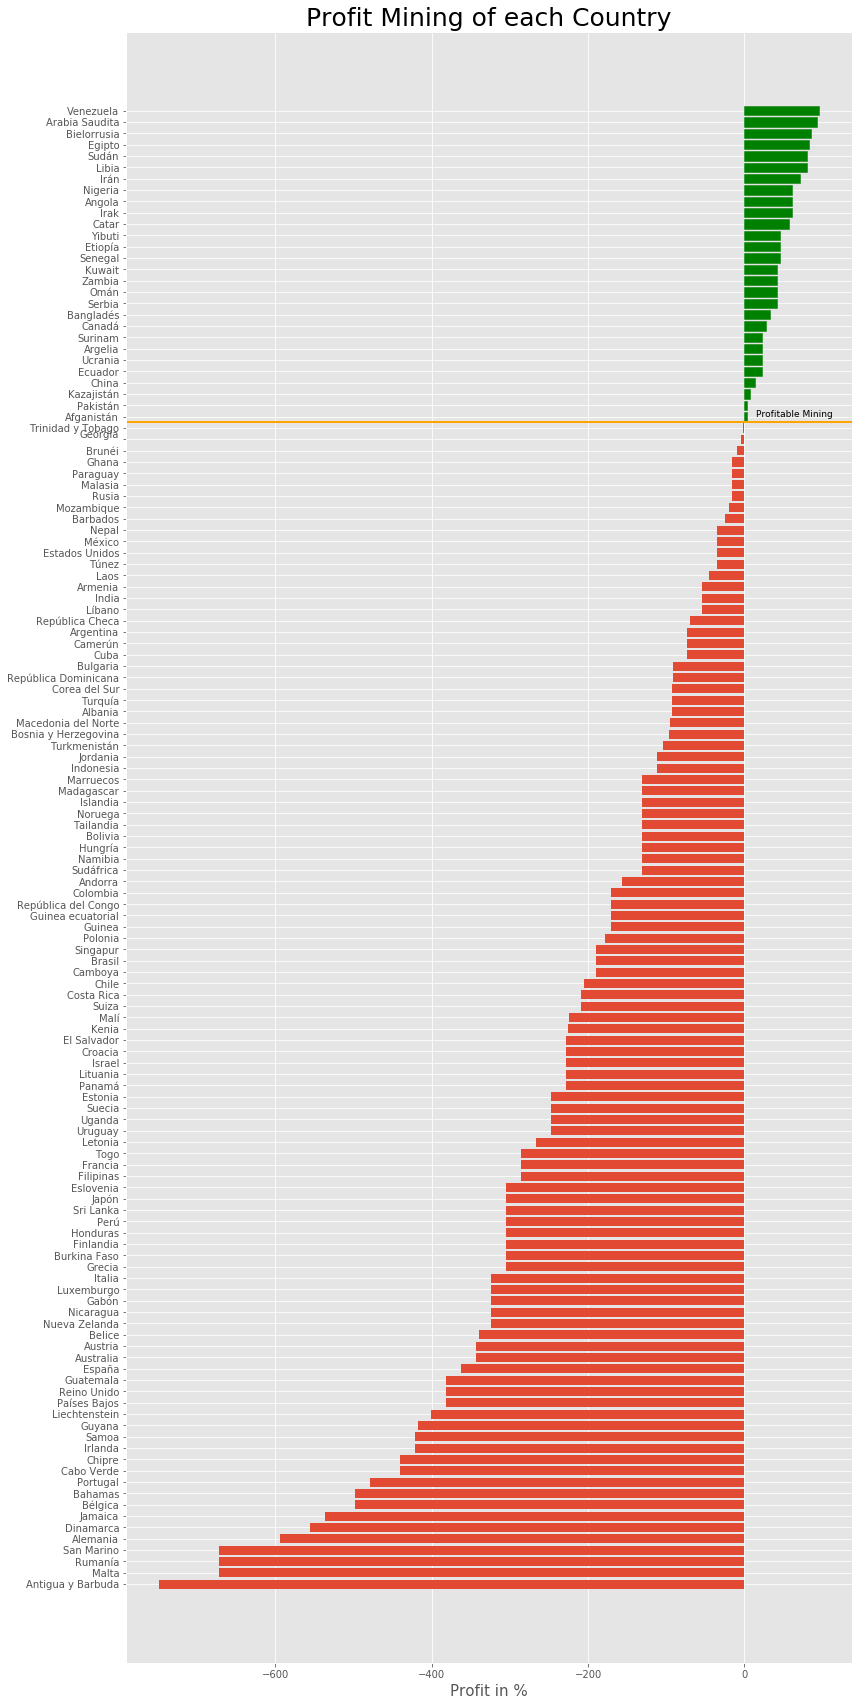

In [215]:
plt.rcParams["figure.figsize"] = [13,30]
fig, ax = plt.subplots()
plt.yticks(size =10)
# ax.set_yticks(y_pos)
# ax.set_yticklabels(size=20)
bar= ax.barh(rankin_data["Country"], rankin_data["Real Profit %"],align='center')
ax.invert_yaxis()  # labels read top-to-bottom
plt.text(x=15,y=27,s="Profitable Mining",fontdict={'weight': 'regular', 'size': 9})
ax.set_xlabel('Profit in %',size=15)
ax.set_title('Profit Mining of each Country',size=25)
plt.axhline(y=27.5, color='orange', linestyle='solid', linewidth=2)
for i in range(28):    
    ax.get_children()[i].set_color("g")
plt.savefig("Profit_country_rank.png")





In [212]:
plt.savefig("Profit_country_rank.png")

<Figure size 1800x4320 with 0 Axes>

In [198]:
for i in range(5):    
    ax.get_children()[i].set_color("g")


In [125]:
ran_img.get_label()

'_container0'

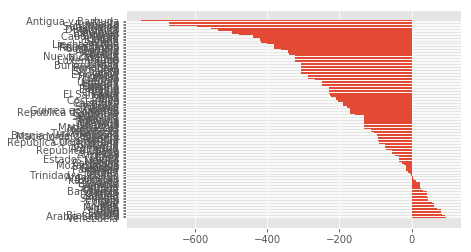

In [110]:
fig